## Importing libraries

In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

## Loading dataset

In [2]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head(8)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [9]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

**Things session is split into below parts**:
* Loading Libraries
* Loading Dataset
* Descriptive and Visual analysis
* Statistical analysis
* Train test dataset split
* Fitting regression model
* Evaluate model performance

In [4]:
df.overall_rating.unique()

array([67., 62., 61., 74., 73., 71., 70., 69., 68., 65., 64., 54., 51.,
       52., 47., 53., 66., 59., 75., 72., 76., 78., 77., 79., 60., 80.,
       81., 82., 84., 48., 63., 83., 55., 58., 50., 56., nan, 49., 57.,
       42., 46., 45., 85., 44., 86., 89., 87., 88., 91., 40., 90., 41.,
       43., 38., 93., 92., 39., 33., 36., 37., 35., 94.])

In [5]:
df.shape

(183978, 42)

In [6]:
df.overall_rating.isna().sum()

836

In [17]:
df.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [20]:
df.shape

(183978, 42)

## Droping null values because do not know what to do with this :)

In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.shape

(180354, 42)

## Descriptive and Visual analysis

In [9]:
df.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
id                     180354 non-null int64
player_fifa_api_id     180354 non-null int64
player_api_id          180354 non-null int64
date                   180354 non-null object
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
accele

In [11]:
pd.set_option('display.precision', 2)

In [12]:
df.describe(include='all')

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.00,180354.00,180354.00,180354,180354.00,180354.00,180354,180354,180354,180354.00,...,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00
unique,NaN,NaN,NaN,197,NaN,NaN,2,8,18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2007-02-22 00:00:00,NaN,NaN,right,medium,medium,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,10410,NaN,NaN,136247,125070,130846,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,91995.89,166822.13,137653.15,NaN,68.64,73.48,NaN,NaN,NaN,55.14,...,57.87,54.93,46.76,50.35,48.03,14.70,15.95,20.53,16.02,16.33
std,53092.66,52821.44,137599.74,NaN,7.03,6.58,NaN,NaN,NaN,17.25,...,15.15,15.56,21.23,21.50,21.59,16.84,15.84,21.14,16.07,17.19
min,1.00,2.00,2625.00,NaN,33.00,39.00,NaN,NaN,NaN,1.00,...,1.00,2.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00
25%,46074.25,156616.00,35451.00,NaN,64.00,69.00,NaN,NaN,NaN,45.00,...,49.00,45.00,25.00,29.00,25.00,7.00,8.00,8.00,8.00,8.00
50%,92003.50,183792.00,80291.00,NaN,69.00,74.00,NaN,NaN,NaN,59.00,...,60.00,57.00,50.00,56.00,53.00,10.00,11.00,12.00,11.00,11.00
75%,137935.75,200138.00,192841.00,NaN,73.00,78.00,NaN,NaN,NaN,68.00,...,69.00,67.00,66.00,69.00,67.00,13.00,15.00,15.00,15.00,15.00


In [13]:
df.dtypes[df.dtypes == 'object']

date                   object
preferred_foot         object
attacking_work_rate    object
defensive_work_rate    object
dtype: object

In [14]:
df.attacking_work_rate.unique()

array(['medium', 'high', 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [15]:
df['preferred_foot_map'] = df.preferred_foot.map({'left':0, 'right':1})

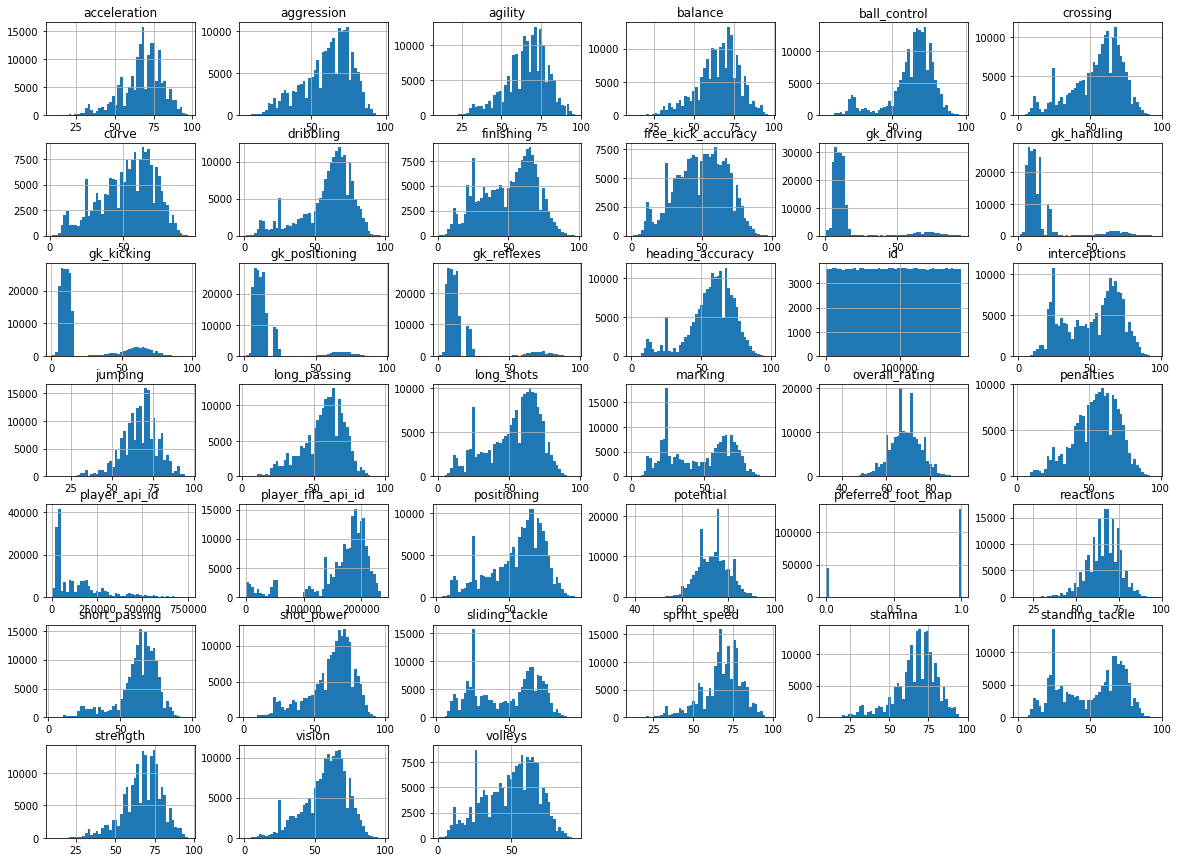

In [17]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [30]:
import seaborn as sns

In [23]:
#df.loc[df.corr() == '1']

In [27]:
df.corr()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_map
id,1.00e+00,3.74e-03,2.05e-03,-3.74e-03,8.37e-04,-0.02,-8.17e-03,-1.18e-02,-6.70e-03,-6.92e-03,...,-1.18e-02,-1.03e-02,-1.25e-02,-1.11e-02,0.01,1.09e-02,8.76e-03,1.40e-02,1.47e-02,2.14e-02
player_fifa_api_id,3.74e-03,1.00e+00,5.57e-01,-2.79e-01,-2.13e-02,-0.07,-2.98e-02,-1.04e-01,-6.53e-02,-8.87e-02,...,-1.75e-01,-7.56e-02,-7.11e-02,-5.52e-02,-0.09,-1.39e-01,-2.48e-01,-1.41e-01,-1.32e-01,-8.63e-03
player_api_id,2.05e-03,5.57e-01,1.00e+00,-3.28e-01,1.06e-02,-0.11,-6.23e-02,-1.30e-01,-9.02e-02,-1.31e-01,...,-1.62e-01,-8.98e-02,-8.67e-02,-7.36e-02,-0.07,-1.25e-01,-2.30e-01,-1.26e-01,-1.22e-01,-7.24e-03
overall_rating,-3.74e-03,-2.79e-01,-3.28e-01,1.00e+00,7.65e-01,0.36,3.30e-01,3.13e-01,4.58e-01,3.62e-01,...,3.93e-01,1.32e-01,1.64e-01,1.28e-01,0.03,6.72e-03,2.88e-02,8.03e-03,7.80e-03,-1.42e-03
potential,8.37e-04,-2.13e-02,1.06e-02,7.65e-01,1.00e+00,0.28,2.88e-01,2.06e-01,3.83e-01,3.02e-01,...,3.15e-01,5.41e-02,8.21e-02,6.33e-02,-0.01,5.86e-03,9.23e-02,4.47e-03,4.94e-03,-3.51e-03
crossing,-2.02e-02,-6.56e-02,-1.13e-01,3.57e-01,2.77e-01,1.00,5.77e-01,3.69e-01,7.90e-01,6.38e-01,...,5.74e-01,2.35e-01,2.85e-01,2.75e-01,-0.60,-5.96e-01,-3.57e-01,-5.98e-01,-6.02e-01,-1.74e-01
finishing,-8.17e-03,-2.98e-02,-6.23e-02,3.30e-01,2.88e-01,0.58,1.00e+00,3.73e-01,5.80e-01,8.51e-01,...,7.26e-01,-2.85e-01,-2.30e-01,-2.62e-01,-0.48,-4.65e-01,-2.92e-01,-4.71e-01,-4.73e-01,1.20e-02
heading_accuracy,-1.18e-02,-1.04e-01,-1.30e-01,3.13e-01,2.06e-01,0.37,3.73e-01,1.00e+00,5.48e-01,3.91e-01,...,4.31e-01,4.61e-01,4.80e-01,4.41e-01,-0.67,-6.49e-01,-4.03e-01,-6.49e-01,-6.52e-01,-4.76e-03
short_passing,-6.70e-03,-6.53e-02,-9.02e-02,4.58e-01,3.83e-01,0.79,5.80e-01,5.48e-01,1.00e+00,6.40e-01,...,6.13e-01,3.50e-01,4.15e-01,3.80e-01,-0.69,-6.90e-01,-4.23e-01,-6.91e-01,-6.93e-01,-7.33e-02
volleys,-6.92e-03,-8.87e-02,-1.31e-01,3.62e-01,3.02e-01,0.64,8.51e-01,3.91e-01,6.40e-01,1.00e+00,...,7.13e-01,-1.70e-01,-1.08e-01,-1.28e-01,-0.51,-4.86e-01,-2.79e-01,-4.90e-01,-4.92e-01,-1.16e-02


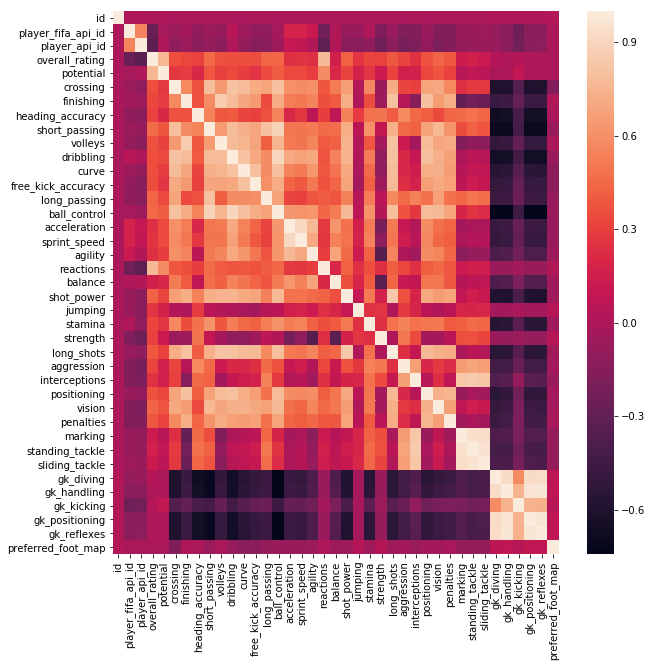

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr())

## Statistical analysis

In [41]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_map
count,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,...,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00
mean,91995.89,166822.13,137653.15,68.64,73.48,55.14,49.96,57.26,62.49,49.49,...,54.93,46.76,50.35,48.03,14.70,15.95,20.53,16.02,16.33,0.76
std,53092.66,52821.44,137599.74,7.03,6.58,17.25,19.04,16.48,14.17,18.25,...,15.56,21.23,21.50,21.59,16.84,15.84,21.14,16.07,17.19,0.43
min,1.00,2.00,2625.00,33.00,39.00,1.00,1.00,1.00,3.00,1.00,...,2.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,46074.25,156616.00,35451.00,64.00,69.00,45.00,34.00,49.00,57.00,35.00,...,45.00,25.00,29.00,25.00,7.00,8.00,8.00,8.00,8.00,1.00
50%,92003.50,183792.00,80291.00,69.00,74.00,59.00,53.00,60.00,65.00,52.00,...,57.00,50.00,56.00,53.00,10.00,11.00,12.00,11.00,11.00,1.00
75%,137935.75,200138.00,192841.00,73.00,78.00,68.00,65.00,68.00,72.00,64.00,...,67.00,66.00,69.00,67.00,13.00,15.00,15.00,15.00,15.00,1.00
max,183978.00,234141.00,750584.00,94.00,97.00,95.00,97.00,98.00,97.00,93.00,...,96.00,94.00,95.00,95.00,94.00,93.00,97.00,96.00,96.00,1.00


In [48]:
df.preferred_foot_map.unique()

array([1, 0], dtype=int64)

In [49]:
groups = df.groupby('preferred_foot_map')

In [54]:
groups.get_group(1).head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_map
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1


In [56]:
import scipy.stats

In [61]:
scipy.stats.ttest_ind(groups.get_group(0)['overall_rating'].values, groups.get_group(1)['overall_rating'].values)

Ttest_indResult(statistic=0.6018239073606174, pvalue=0.5472921159445305)

### Check if tip is significant of mpg with different cylinder values.

In [64]:
for cols in df.dtypes[df.dtypes == 'float64'].index:
    out = scipy.stats.ttest_ind(groups.get_group(0)[cols].values, groups.get_group(1)[cols].values)
    print(cols, out)

overall_rating Ttest_indResult(statistic=0.6018239073606174, pvalue=0.5472921159445305)
potential Ttest_indResult(statistic=1.492010889112252, pvalue=0.13569803984777862)
crossing Ttest_indResult(statistic=75.05358154773879, pvalue=0.0)
finishing Ttest_indResult(statistic=-5.098357189463156, pvalue=3.429592174304653e-07)
heading_accuracy Ttest_indResult(statistic=2.0235724673174125, pvalue=0.04301563202377445)
short_passing Ttest_indResult(statistic=31.2138425786991, pvalue=2.5722761855470277e-213)
volleys Ttest_indResult(statistic=4.914514332586567, pvalue=8.908067790237903e-07)
dribbling Ttest_indResult(statistic=35.72705054400776, pvalue=1.428271467562768e-278)
curve Ttest_indResult(statistic=55.0317003954445, pvalue=0.0)
free_kick_accuracy Ttest_indResult(statistic=53.27639228675551, pvalue=0.0)
long_passing Ttest_indResult(statistic=40.406003775106704, pvalue=0.0)
ball_control Ttest_indResult(statistic=31.80281752980027, pvalue=2.437332237589179e-221)
acceleration Ttest_indResult(

## Train test dataset split

In [65]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'preferred_foot_map'],
      dtype='object')

In [74]:
df.attacking_work_rate.unique()

array(['medium', 'high', 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [75]:
df.defensive_work_rate.unique()

array(['medium', 'high', 'low', '5', 'ean', 'o', '1', 'ormal', '7', '2',
       '8', '4', 'tocky', '0', '3', '6', '9', 'es'], dtype=object)

In [70]:
import numpy as np
#help(np.log)

In [79]:
#df.drop(columns=['date', 'attacking_work_rate', 'defensive_work_rate'])

In [81]:
df.drop(columns=['preferred_foot'], inplace=True)

In [84]:
y = df['overall_rating']

In [86]:
X = df.drop(['overall_rating'], axis=1)

In [ ]:
#Using 80:20 split to get train and test data

In [88]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 10)

## Fitting regression model

In [89]:
lm = LinearRegression()
lm.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
lm.intercept_

0.3668625336046034

In [91]:
lm.coef_

array([ 2.96041435e-08, -8.69166978e-06, -6.56667079e-06,  4.50815396e-01,
        5.87548573e-03,  1.43118929e-02,  5.60295390e-02,  5.58235330e-02,
       -6.01984127e-03,  8.66062288e-03,  1.19637226e-02,  6.84082806e-03,
        1.07136956e-02,  1.11535639e-01,  1.20137271e-02,  1.42413478e-02,
       -1.05979991e-02,  1.77400281e-01,  5.71480593e-03,  1.34794148e-02,
        1.16375418e-02, -2.64971098e-03,  5.22405115e-02, -1.07855099e-02,
        1.09118103e-02,  3.92600739e-03, -6.97358285e-03, -1.92905999e-02,
        9.65010070e-03,  2.62170976e-02,  6.06270987e-03, -1.86726175e-02,
        1.56794960e-01,  2.46345216e-02, -4.68560719e-02,  4.53516640e-02,
        1.89022058e-02,  6.76179751e-03])

In [92]:
import statsmodels.formula.api as smf

In [94]:
X.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'potential', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'preferred_foot_map'],
      dtype='object')

In [96]:
lms = smf.ols(formula='overall_rating ~ id+player_fifa_api_id+player_api_id+potential+crossing+finishing+heading_accuracy+short_passing+volleys+dribbling+curve+free_kick_accuracy+long_passing+ball_control+acceleration+sprint_speed+agility+reactions+balance+shot_power+jumping+stamina+strength+long_shots+aggression+interceptions+positioning+vision+penalties+marking+standing_tackle+sliding_tackle+gk_diving+gk_handling+gk_kicking+gk_positioning+gk_reflexes+preferred_foot_map', data=df).fit()
lms.conf_int()
lms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 2.896e+04
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:17:26   Log-Likelihood:            -4.3080e+05
No. Observations:              180354   AIC:                         8.617e+05
Df Residuals:                  180315   BIC:                         8.621e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4323      0.096      4.522      0.000       0.245       0.620
id                  4.221e-08   1.17e-07      0.360      0.719   -1.87e-07    2.72e-07
player_fifa_api_id -8.811e-06   1.53e-07    -57.616      0.000   -9.11e-06   -8.51e-06
player_api_id      -6.518e-06   6.15e-08   -105.987      0.000   -6.64e-06    -6.4e-06
potential              0.4494      0.001    306.691      0.000       0.447       0.452
crossing               0.0060      0.001      7.480      0.000       0.004       0.008
finishing              0.0149      0.001     17.030      0.000       0.013       0.017
heading_accuracy       0.0563      0.001     72.179      0.000       0.055       0.058
short_passing          0.0559      0.001     42.692      0.000       0.053       0.058
volleys               -0.0061      0.001     -7.751      0.000      -0.008      -0.005
dribbling              0.0089      0.001      7.975      0.000       0.007       0.011
curve                  0.0114      0.001     15.037      0.000       0.010       0.013
free_kick_accuracy     0.0075      0.001     11.038      0.000       0.006       0.009
long_passing           0.0103      0.001     11.541      0.000       0.009       0.012
ball_control           0.1127      0.002     74.612      0.000       0.110       0.116
acceleration           0.0123      0.001      9.407      0.000       0.010       0.015
sprint_speed           0.0149      0.001     12.020      0.000       0.012       0.017
agility               -0.0116      0.001    -11.997      0.000      -0.013      -0.010
reactions              0.1770      0.001    168.255      0.000       0.175       0.179
balance                0.0054      0.001      7.203      0.000       0.004       0.007
shot_power             0.0133      0.001     16.035      0.000       0.012       0.015
jumping                0.0115      0.001     16.627      0.000       0.010       0.013
stamina               -0.0024      0.001     -3.050      0.002      -0.004      -0.001
strength               0.0515      0.001     64.576      0.000       0.050       0.053
long_shots            -0.0111      0.001    -12.739      0.000      -0.013      -0.009
aggression             0.0114      0.001     17.467      0.000       0.010       0.013
interceptions          0.0034      0.001      4.855      0.000       0.002       0.005
positioning           -0.0073      0.001     -9.691      0.000      -0.009      -0.006
vision                -0.0181      0.001    -21.685      0.000      -0.020      -0.017
penalties              0.0088      0.001     12.312      0.000       0.007       0.010
marking                0.0261      0.001     24.507      0.000       0.024       0.028
standing_tackle        0.0066      0.001      5.317      0.000       0.004       0.009
sliding_tackle        -0.0187      0.0

## Evaluate model performance

In [97]:
lm.score(train_X, train_y)

0.8596080277348376

In [98]:
lm.score(test_X, test_y)

0.85754121871232

In [99]:
lm.predict(test_X)

array([74.24555248, 74.50385721, 65.37256339, ..., 64.03542323,
       73.18182255, 67.63651271])

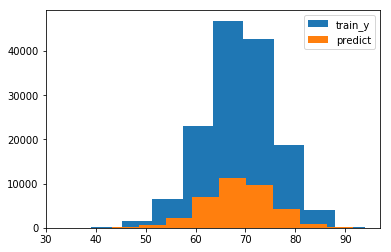

In [100]:
plt.hist(train_y, label='train_y')
plt.hist(lm.predict(test_X), label='predict')
plt.legend()

In [103]:
test_pred = lm.predict(test_X)
train_pred = lm.predict(train_X)

In [104]:
math.sqrt(mean_squared_error(train_pred, train_y))

2.6300865033361984

In [106]:
math.sqrt(mean_squared_error(test_pred, test_y))

2.6654538425811993

In [110]:
test_y.mean()

68.61439937900252

In [109]:
train_y.mean()

68.64054670335382

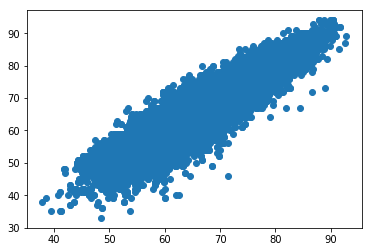

In [108]:
plt.scatter(train_pred, train_y)

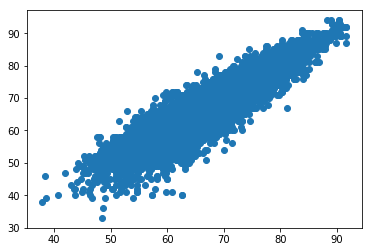

In [112]:
plt.scatter(test_pred, test_y)